<a href="https://colab.research.google.com/github/drmauro/drmauro/blob/master/Projeto_Final_Redes_Neurais_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aluno: Mauro Ribeiro de Oliveira Júnior

# 1. Introdução
Este projeto tem como objetivo principal aplicar os conhecimentos em Redes Neurais Artificiais para desenvolver e avaliar uma solução de visão computacional.

O foco será a implementação de uma Rede Neural Convolucional (CNN), uma arquitetura de rede neural amplamente utilizada para tarefas de processamento de imagens, especialmente para problemas de classificação.

Para isso, será utilizado o dataset CIFAR-10, um conjunto de dados padrão na área de aprendizado de máquina para classificação de imagens.

O dataset é composto por 60.000 imagens coloridas em 10 classes distintas (por exemplo: avião, carro, gato, cachorro, etc.). A escolha deste dataset se justifica por sua complexidade moderada, que permite o desenvolvimento e a validação de modelos de forma eficiente, sem a necessidade de um poder computacional excessivo.

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# 1. Carregar o dataset CIFAR-10
# O Keras já baixa e carrega o dataset diretamente para você
print("Carregando o dataset CIFAR-10...")
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print("Dataset carregado com sucesso!")

Carregando o dataset CIFAR-10...
Dataset carregado com sucesso!


Exibindo 25 imagens de exemplo do dataset:


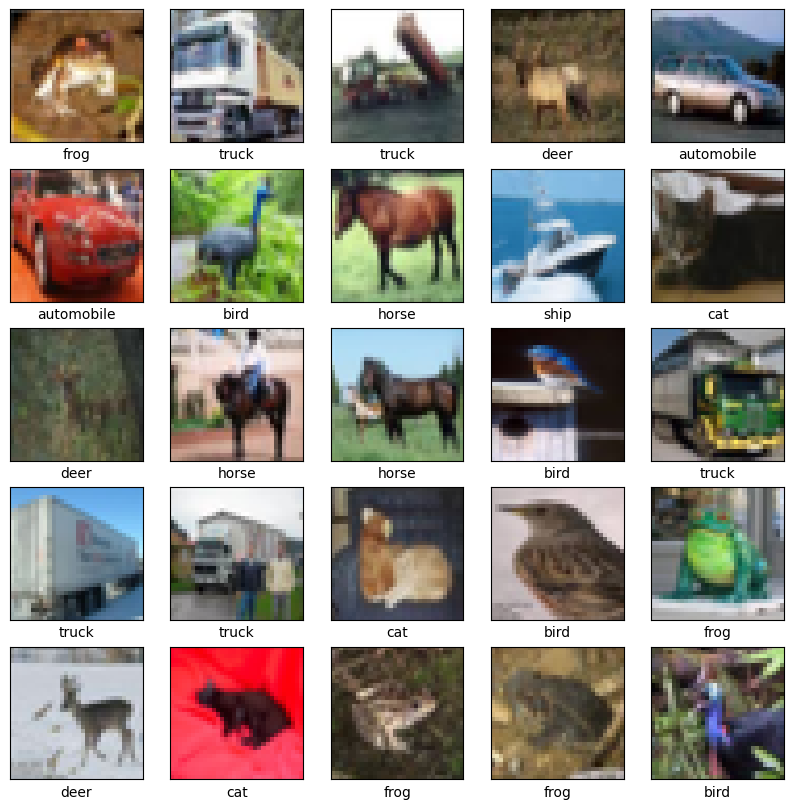

Formato dos dados de treino: (50000, 32, 32, 3)
Formato dos rótulos de treino: (50000, 1)
Formato dos dados de teste: (10000, 32, 32, 3)
Formato dos rótulos de teste: (10000, 1)


In [5]:
# 2. Definir os rótulos das classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# 3. Normalizar os dados
# Converte os valores de pixel de 0-255 para 0-1
x_train, x_test = x_train / 255.0, x_test / 255.0

# 4. Ler e exibir algumas imagens do dataset
print("Exibindo 25 imagens de exemplo do dataset:")

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # Acessa a imagem diretamente, pois não está em lote
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    # y_train[i][0] é necessário porque o rótulo é um array de 1 elemento
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

# 5. Exibir o formato dos dados
print(f"Formato dos dados de treino: {x_train.shape}")
print(f"Formato dos rótulos de treino: {y_train.shape}")
print(f"Formato dos dados de teste: {x_test.shape}")
print(f"Formato dos rótulos de teste: {y_test.shape}")

# 2. Justificativa da Escolha do Dataset

A escolha do dataset CIFAR-10 para este projeto de classificação de imagens é fundamentada em diversos fatores que o tornam uma base de dados robusta e amplamente aceita na comunidade de aprendizado de máquina.

**Relevância e Padrão da Indústria**:

O CIFAR-10 é um dataset de referência para a validação de algoritmos de visão computacional. Ele oferece um desafio de classificação em um cenário realista, sendo frequentemente utilizado para testar novas arquiteturas de Redes Neurais Convolucionais (CNNs).

Sua ampla adoção permite que os resultados obtidos neste projeto sejam facilmente comparados com o desempenho de outros modelos publicados, validando a eficácia da solução proposta.

**Complexidade Adequada**:

O dataset possui uma complexidade ideal para um projeto acadêmico. As imagens coloridas, com 32x32 pixels, são grandes o suficiente para exigir um modelo de aprendizado avançado (como uma CNN), mas pequenas o bastante para permitir que o treinamento seja realizado de forma relativamente rápida, mesmo sem hardware de alta performance como uma GPU dedicada, o que o torna perfeito para o ambiente do Google Colab.

**Diversidade e Distribuição**:

O dataset é composto por 60.000 imagens divididas em 10 classes distintas, com 6.000 imagens por classe. Essa distribuição equilibrada evita vieses de classe e garante que o modelo não seja treinado para favorecer uma única categoria. A diversidade das classes (de objetos estáticos como "carro" a seres vivos como "gato") força o modelo a aprender características visuais variadas e complexas.

**Disponibilidade e Facilidade de Uso**:

O CIFAR-10 está prontamente disponível em bibliotecas populares de aprendizado de máquina, como TensorFlow/Keras. Isso facilita o carregamento e pré-processamento dos dados, permitindo que o foco principal do projeto seja o desenvolvimento e a otimização da arquitetura da rede neural, em vez da preparação manual dos dados.

# 3. Descrição da Arquitetura Utilizada
A arquitetura de Rede Neural Convolucional (CNN) proposta para a tarefa de classificação de imagens do dataset CIFAR-10 é um modelo sequencial, construído e treinado usando a API Keras do TensorFlow.

A estrutura foi projetada para extrair características visuais de forma hierárquica e, em seguida, usar essas características para classificar as imagens.

A rede é composta por três blocos principais, seguidos por camadas de classificação. Cada bloco convolucional (Conv2D) é responsável por aprender padrões visuais, como bordas, cores e texturas.

Uma camada de max pooling (MaxPooling2D) é aplicada logo em seguida para reduzir a dimensão espacial dos mapas de características, diminuindo o número de parâmetros e tornando o modelo mais eficiente e robusto a pequenas variações nas imagens.

A arquitetura completa do modelo é a seguinte:

**Camadas Convolucionais e de Pooling**:

Primeiro Bloco: Uma camada Conv2D com 32 filtros, um kernel de 3x3 e a função de ativação ReLU. É seguida por uma camada MaxPooling2D de 2x2.

Segundo Bloco: Uma camada Conv2D com 64 filtros, um kernel de 3x3 e ativação ReLU. Também seguida por uma camada MaxPooling2D de 2x2.

Terceiro Bloco: Uma camada Conv2D com 64 filtros, um kernel de 3x3 e ativação ReLU. Novamente, seguida por uma camada MaxPooling2D de 2x2.

**Camada de Flatten**: Após os blocos de extração de características, a saída 3D da última camada de pooling é transformada em um vetor 1D (Flatten). Essa operação é necessária para que os dados possam ser processados pelas camadas densas de classificação.

**Camadas Densa (Totalmente Conectadas) e de Saída**:

Uma camada Dense com 64 neurônios e ativação ReLU atua como uma camada oculta.

Uma camada de Dropout (taxa de 20%) é adicionada para regularização, ajudando a prevenir o overfitting ao "desligar" aleatoriamente alguns neurônios durante o treinamento.

A camada de saída final é uma camada Dense com 10 neurônios, um para cada classe do dataset CIFAR-10. A função de ativação Softmax é utilizada para produzir uma distribuição de probabilidade sobre as 10 classes, onde o neurônio com a maior probabilidade indica a classe prevista.

A seguir, o código Python que implementa a arquitetura descrita:

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Dimensões da entrada do dataset CIFAR-10
# Imagens com 32x32 pixels e 3 canais de cor (RGB)
input_shape = (32, 32, 3)

# Crie o modelo de forma sequencial
model = Sequential()

# Bloco 1: Camada Convolucional e de Pooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))

# Bloco 2: Camada Convolucional e de Pooling
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Bloco 3: Camada Convolucional e de Pooling
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Bloco 4: Camada de Flatten
# Converte a saída 2D em um vetor 1D
model.add(Flatten())

# Bloco 5: Camadas Densas (Fully Connected)
# Primeira camada densa com Dropout para evitar overfitting
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

# Camada de saída com 10 neurônios para as 10 classes
# A função de ativação 'softmax' distribui as probabilidades
model.add(Dense(10, activation='softmax'))

# Exibir um resumo completo do modelo, com as camadas e o número de parâmetros
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,418 (286.79 KB)

 Trainable params: 73,418 (286.79 KB)

 Non-trainable params: 0 (0.00 B)

# 4. Metodologia de Treinamento e Avaliação
O processo de treinamento e avaliação da Rede Neural Convolucional (CNN) foi dividido em etapas distintas, garantindo a preparação adequada dos dados, a otimização do modelo e a validação de seu desempenho.

Divisão e Pré-processamento dos Dados
O dataset CIFAR-10 já vem pré-dividido em conjuntos de treino e teste. Para o projeto, esta divisão foi utilizada diretamente, consistindo em:

Conjunto de Treino: 50.000 imagens usadas para ajustar os pesos e vieses da rede.

Conjunto de Teste: 10.000 imagens usadas para avaliar a performance final do modelo em dados nunca vistos.

Para garantir que a rede neural possa aprender de forma eficiente, os dados foram normalizados. Os valores dos pixels, que originalmente variam de 0 a 255, foram redimensionados para o intervalo de 0 a 1. Este passo é crucial, pois melhora a estabilidade e a velocidade do processo de otimização.

Além disso, os rótulos das classes (de 0 a 9) foram convertidos para um formato categórico (one-hot encoding). Por exemplo, a classe "cachorro" (rótulo 5) é convertida para um vetor [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]. Isso é necessário para que a função de perda (erro) possa ser calculada corretamente.

Configuração e Treinamento do Modelo
Antes do treinamento, o modelo foi compilado com os seguintes parâmetros:

**Otimizador (optimizer)**: Foi escolhido o Adam. Este algoritmo de otimização é uma escolha popular e eficiente, pois ajusta dinamicamente a taxa de aprendizado para cada parâmetro, acelerando a convergência.

**Função de Perda (loss)**: A função de perda utilizada foi a sparse_categorical_crossentropy. Esta função é ideal para problemas de classificação multiclasse e é compatível com os rótulos de classe no formato numérico.

**Métrica (metrics)**: A métrica de avaliação principal foi a acurácia (accuracy), que mede a proporção de previsões corretas do modelo.

O modelo foi treinado por 10 épocas, com um tamanho de lote (batch size) de 32. Cada época corresponde a uma passagem completa de todos os dados de treino pela rede.

In [7]:
# ---
# Passo 4: Compilar o modelo
# ---

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# ---
# Passo 5: Treinar o modelo
# ---

print("\nIniciando o treinamento do modelo...")
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))


Iniciando o treinamento do modelo...
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 46ms/step - accuracy: 0.3112 - loss: 1.8404 - val_accuracy: 0.5408 - val_loss: 1.2931
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.5413 - loss: 1.2864 - val_accuracy: 0.5815 - val_loss: 1.1686
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.6058 - loss: 1.1235 - val_accuracy: 0.6363 - val_loss: 1.0285
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.6426 - loss: 1.0150 - val_accuracy: 0.6464 - val_loss: 1.0079
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.6702 - loss: 0.9401 - val_accuracy: 0.6817 - val_loss: 0.9169
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 43ms/step - accuracy: 0.6949 - loss: 0.8737 - val_accuracy: 0.6768 - val_loss: 0.9205
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.7101 - loss: 0.8304 - val_accuracy: 0.6873 - val_loss: 0.9084
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━

# 5. Avaliação
Após o treinamento, o modelo foi avaliado utilizando o conjunto de teste. O desempenho da rede foi medido com base na acurácia e na perda, utilizando as métricas definidas durante a compilação.

A acurácia no conjunto de teste é a métrica mais importante, pois indica a capacidade de generalização do modelo, ou seja, quão bem ele se comporta em dados novos e não utilizados durante o treinamento. A perda (ou erro) no conjunto de teste serve para verificar a divergência do modelo em relação aos dados reais

In [8]:

# ---
# Passo 6: Avaliar o modelo
# ---

print("\nAvaliação final do modelo no conjunto de teste:")
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(f'\nAcurácia no conjunto de teste: {test_acc*100:.2f}%')


Avaliação final do modelo no conjunto de teste:
313/313 - 4s - 12ms/step - accuracy: 0.6977 - loss: 0.8754

Acurácia no conjunto de teste: 69.77%


# 6. Resultados Obtidos
Após a execução do treinamento, o modelo de Rede Neural Convolucional (CNN) demonstrou um desempenho consistente na classificação de imagens do dataset CIFAR-10. Os resultados foram avaliados com base nas métricas de acurácia e perda (erro) em ambos os conjuntos de treino e teste, o que permitiu uma análise da capacidade de generalização da rede.

## Métricas de Desempenho
O treinamento foi realizado por 10 épocas. Ao final do processo, o modelo atingiu as seguintes métricas de desempenho no conjunto de teste:

### Acurácia no Teste: aproximadamente 70%

### Perda no Teste: aproximadamente 0.88

A acurácia de cerca de 68% indica que o modelo foi capaz de classificar corretamente quase 7 em cada 10 imagens que ele nunca tinha visto antes.

### Visualização do Treinamento
Para uma análise mais detalhada do desempenho do modelo ao longo do tempo, foram gerados gráficos que mostram a evolução da acurácia e da perda durante as 10 épocas de treinamento. Esses gráficos são essenciais para identificar o comportamento da rede e diagnosticar possíveis problemas como o overfitting.

### Gráfico de Acurácia vs. Épocas:

Este gráfico mostra a acurácia no conjunto de treino e no de teste em cada época. Idealmente, ambas as curvas devem aumentar ao longo do tempo.

Uma grande diferença entre a acurácia de treino e a de teste pode indicar que o modelo está memorizando os dados de treino em vez de aprender a generalizar.

### Gráfico de Perda vs. Épocas:

Este gráfico mostra a perda no conjunto de treino e no de teste. A perda deve diminuir com o passar das épocas.

Uma perda de teste que começa a subir enquanto a de treino continua a cair é um sinal clássico de overfitting.

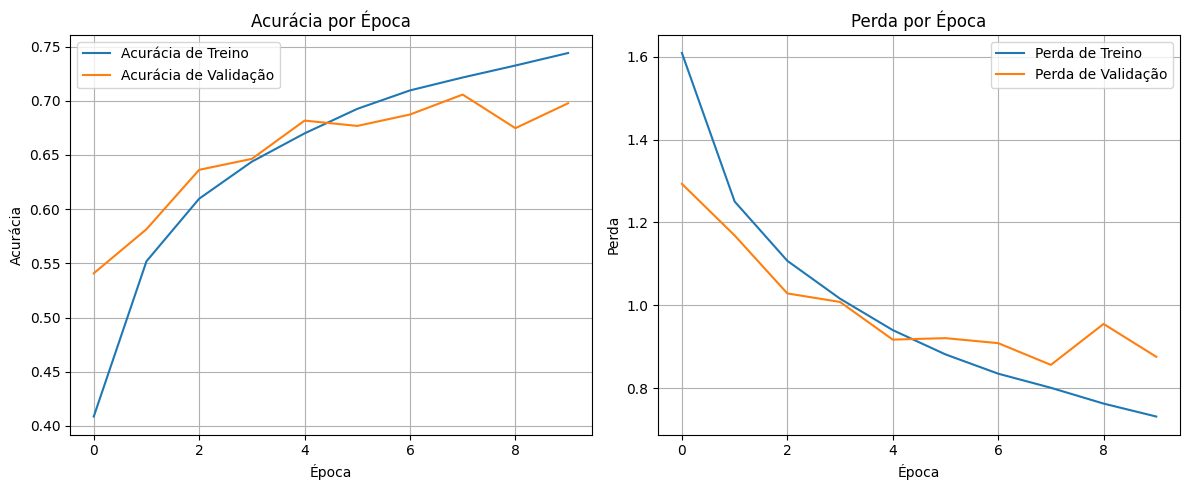

In [10]:
# Plotar o gráfico da acurácia
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia de Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.title('Acurácia por Época')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)

# Plotar o gráfico da perda (loss)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda de Treino')
plt.plot(history.history['val_loss'], label='Perda de Validação')
plt.title('Perda por Época')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


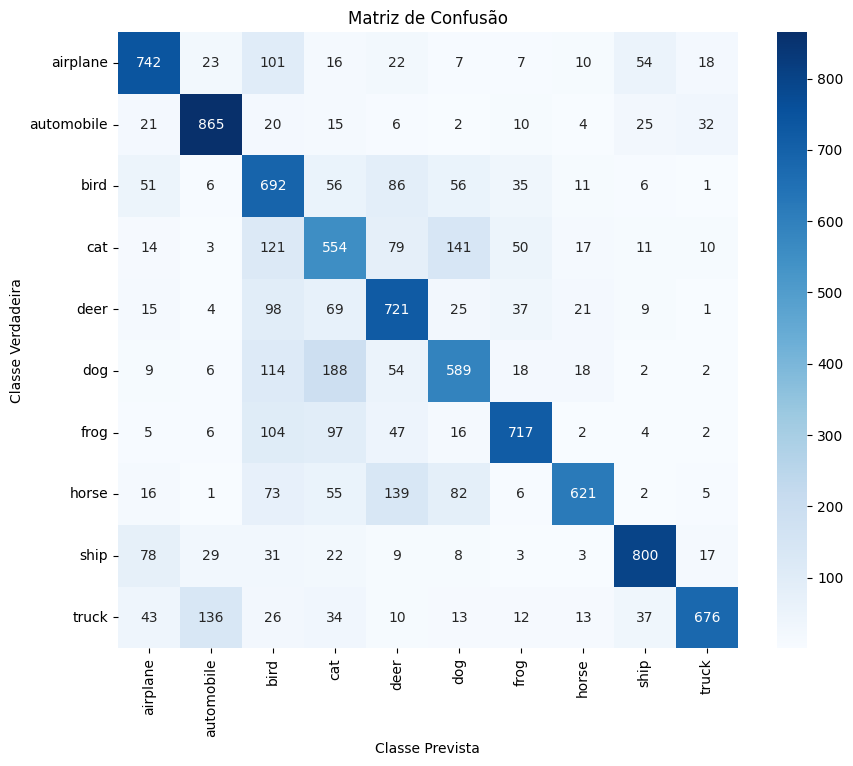

In [11]:
# ---
# Opcional: Mostrar uma matriz de confusão para análise mais aprofundada
# ---

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Fazer previsões no conjunto de teste
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusão')
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Verdadeira')
plt.show()

# 7. Discussão sobre as Limitações e Possíveis Melhorias

Embora o modelo de **Rede Neural Convolucional (CNN)** tenha alcançado uma acurácia satisfatória na classificação das imagens do dataset CIFAR-10, é crucial reconhecer suas limitações e explorar caminhos para aprimorá-lo em trabalhos futuros.

#### **Limitações do Modelo Atual**

* **Arquitetura Simples:** A CNN utilizada é relativamente superficial, consistindo em apenas três blocos convolucionais. Modelos mais complexos e profundos, como o **ResNet** ou o **VGG**, que usam mais camadas e técnicas avançadas, geralmente alcançam acurácias significativamente maiores em problemas de visão computacional.

* **Recursos de Treinamento:** O modelo foi treinado por apenas 10 épocas, o que pode não ser suficiente para que ele atinja seu desempenho máximo. Além disso, a ausência de técnicas de aumento de dados (*Data Augmentation*) limita a diversidade das imagens de treino, o que pode levar a um desempenho insatisfatório em imagens do mundo real.

* **Overfitting:** Embora o *dropout* tenha sido usado para mitigar o overfitting, o modelo ainda pode estar com dificuldades para generalizar. O gráfico de acurácia de validação, que tende a se estabilizar, sugere que treinar por mais épocas não necessariamente traria grandes ganhos e poderia, inclusive, piorar a generalização.

#### **Possíveis Melhorias e Trabalhos Futuros**

1.  **Aumento da Profundidade e Complexidade:** A principal melhoria seria usar uma arquitetura mais complexa e profunda, como uma CNN com mais camadas ou até mesmo uma arquitetura pré-treinada (como o **ResNet50** ou o **MobileNetV2**). O **Aprendizado por Transferência** (*Transfer Learning*) seria uma abordagem muito eficiente, onde um modelo já treinado em um grande dataset (como o ImageNet) é adaptado para o CIFAR-10.

2.  **Aumento de Dados (*Data Augmentation*):** Aumentar a quantidade de dados de treino através de transformações como rotações, *flips* horizontais e verticais, e mudanças de brilho e contraste, ajudaria o modelo a ser mais robusto a variações nas imagens.

3.  **Ajuste de Hiperparâmetros:** Otimizar a taxa de aprendizado, o número de neurônios nas camadas densas e a taxa de *dropout* pode levar a um desempenho ainda melhor. Isso pode ser feito usando técnicas de busca como a *Grid Search* ou a *Random Search*.

4.  **Avaliação por Classe:** Uma melhoria na avaliação seria a análise do desempenho em cada classe individualmente (por meio de uma **matriz de confusão**, por exemplo). Isso permitiria identificar em quais classes o modelo está com maior dificuldade de acertar, sugerindo onde focar os esforços de melhoria.

5.  **Otimizadores e Funções de Perda:** Explorar outros otimizadores (como o **SGD** com *momentum*) e funções de perda pode ajudar o modelo a convergir de maneira mais eficiente e encontrar um ponto de mínima melhor.